# Post processing

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

Load libraries

In [2]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import dill

Load environment

In [3]:
dill.load_session('tmp/globalsave.pkl')

Check for how many POSs we have surroundings info

In [4]:
POSs_y = list(df_aggregate_per_day_short.store_code.unique())
POSs_surr = list(metadata_no_day.store_code)

len(POSs_y), len(POSs_surr), sum([x in POSs_surr for x in POSs_y]), round(sum([x in POSs_surr for x in POSs_y])/len(POSs_y),3)

(903, 546, 539, 0.597)

Info about surroudings for ~59% POSs.

In [5]:
POSs_with_surr_no_y = list(set(POSs_surr)-set(POSs_y))
POSs_with_surr_no_y.sort()
POSs_with_surr_no_y

[12028, 15133, 20447, 24370, 29459, 32289]

For 6 POSs we have info about the surroundings but without information on selling. 

Since the goal of the analysis is to understand which surroundings leads to top POS performances, we removed from all further analyses the POSs without surrounding information.

In [6]:
df_aggregate_per_day_short_with_info = df_aggregate_per_day_short[df_aggregate_per_day_short.store_code.isin(POSs_surr)]

## Some additional quality control

### Closing vs not-selling days
Investigate how many days shop open (under assumption made in `analysis` and how many are selling days.

In [7]:
df_aggregate_per_day_short[df_aggregate_per_day_short.store_code == 249]

,store_code,date,volume_day,volume_nan,volume_n,Perc_nan,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,249,2016-12-13,300.0,17.0,18.0,0.944444,2016,12,50,13,1,348,False,False,False,False,False,False,1481587200
1,249,2016-12-14,0.0,18.0,18.0,1.000000,2016,12,50,14,2,349,False,False,False,False,False,False,1481673600
2,249,2016-12-15,0.0,18.0,18.0,1.000000,2016,12,50,15,3,350,False,False,False,False,False,False,1481760000
3,249,2016-12-16,0.0,18.0,18.0,1.000000,2016,12,50,16,4,351,False,False,False,False,False,False,1481846400
4,249,2016-12-17,0.0,19.0,19.0,1.000000,2016,12,50,17,5,352,False,False,False,False,False,False,1481932800
5,249,2016-12-18,0.0,17.0,17.0,1.000000,2016,12,50,18,6,353,False,False,False,False,False,False,1482019200
6,249,2016-12-19,0.0,19.0,19.0,1.000000,2016,12,51,19,0,354,False,False,False,False,False,False,1482105600
7,249,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,1,355,False,False,False,False,False,False,1482192000
8,249,2016-12-21,30.0,17.0,18.0,0.944444,2016,12,51,21,2,356,False,False,False,False,False,False,1482278400
9,249,2016-12-22,300.0,16.0,17.0,0.941176,2016,12,51,22,3,357,False,False,False,False,False,False,1482364800


In [8]:
def get_lag(shop):
    d = {}
    d['days'] = (max(shop['date']) - min(shop['date'])).days  + 1
    d['days_sell'] = np.count_nonzero(shop['volume_day'])
    d['volume_tot'] = sum(shop['volume_day'])
    return pd.Series(d, index = ['days','days_sell','volume_tot'])


flds = ['store_code','volume_day','date']
df_shops_days = df_aggregate_per_day_short_with_info[flds].groupby('store_code').apply(get_lag).reset_index()
df_shops_days['prop_selling_days'] = df_shops_days.days_sell/df_shops_days.days
df_shops_days.sort_values('days',inplace=True)
df_shops_days.head(80)

,store_code,days,days_sell,volume_tot,prop_selling_days
39,11007,1.0,1.0,60.0,1.000000
16,4032,1.0,1.0,30.0,1.000000
12,3745,1.0,1.0,30.0,1.000000
496,32357,1.0,1.0,300.0,1.000000
11,3655,2.0,2.0,90.0,1.000000
15,4013,3.0,3.0,420.0,1.000000
2,1498,4.0,3.0,360.0,0.750000
4,2331,4.0,2.0,60.0,0.500000
14,3958,4.0,3.0,240.0,0.750000
8,3075,5.0,5.0,390.0,1.000000


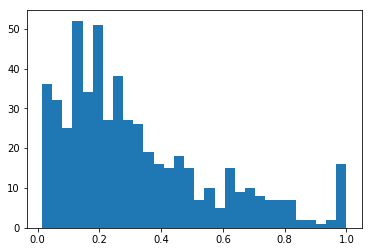

In [9]:
plt.hist(df_shops_days.prop_selling_days, bins=30);

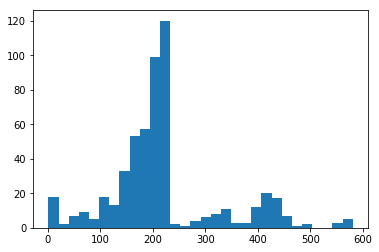

In [10]:
plt.hist(df_shops_days.days, bins = 30);

In [11]:
df_shops_days[(df_shops_days.days>180) & (df_shops_days.prop_selling_days < 0.05)]

,store_code,days,days_sell,volume_tot,prop_selling_days
481,32040,183.0,5.0,150.0,0.027322
508,32780,185.0,8.0,1260.0,0.043243
533,46361,187.0,7.0,510.0,0.037433
413,30314,188.0,8.0,270.0,0.042553
366,28739,188.0,9.0,600.0,0.047872
125,19258,196.0,7.0,1350.0,0.035714
313,26970,200.0,8.0,810.0,0.040000
281,25755,208.0,9.0,630.0,0.043269
452,31244,212.0,3.0,180.0,0.014151
279,25650,442.0,16.0,2220.0,0.036199


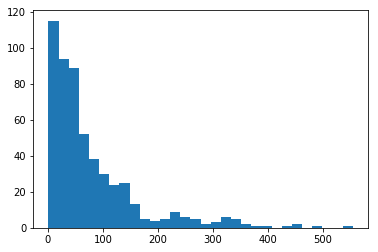

In [12]:
plt.hist(df_shops_days.days_sell, bins=30);

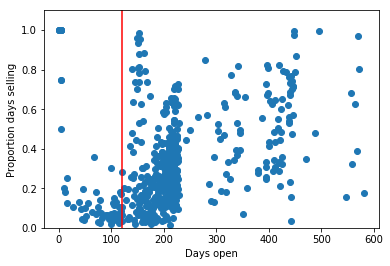

In [13]:
plt.scatter(df_shops_days.days, df_shops_days.prop_selling_days)
plt.ylim(0,1.1)
plt.xlabel('Days open')
plt.ylabel('Proportion days selling');
plt.axvline(x=120, color = 'red');

Although we deleted all days before the first sell and after the last sell, we still see that for several shops we have few selling days.
This might be due to the fact that some shops closed in specific days of the week (i.e. Sundays), but it might be due to missing values into the time seris.

We discard all the shops with less than 120 of opening days, since they might bias our analysis: additional 61 shops.

In [14]:
df_shops_days_filer = df_shops_days[df_shops_days.days >= 120]
df_shops_days.shape[0] - df_shops_days_filer.shape[0]

61

In [15]:
df_shops_days_filer['norm_volume_all_days'] = df_shops_days_filer.volume_tot/df_shops_days_filer.days
df_shops_days_filer['norm_volume_selling_days'] = df_shops_days_filer.volume_tot/df_shops_days_filer.days_sell

/anaconda3/envs/pmi_interview/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/pmi_interview/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_aggregate_per_day_short_with_info_filter = df_aggregate_per_day_short_with_info[df_aggregate_per_day_short_with_info.store_code.isin(df_shops_days.store_code)]

### Check seasonality

In [17]:
def all_POSs_aggregate(x):
    d = {}
    d['Dayofweek'] = x['Dayofweek'].iloc[0]
    d['n_shops'] = x['store_code'].nunique()
    d['n_open_shops'] = np.count_nonzero(x['volume_day'])
    d['tot_volume'] = x['volume_day'].sum()
    return pd.Series(d, index=['Dayofweek','n_shops','n_open_shops','tot_volume'])

seasonality = df_aggregate_per_day_short_with_info_filter.groupby('date').apply(all_POSs_aggregate)
seasonality['norm_volume'] = seasonality.tot_volume/seasonality.n_shops
seasonality['norm_volume_open'] = seasonality.tot_volume/seasonality.n_open_shops
seasonality.head()

,Dayofweek,n_shops,n_open_shops,tot_volume,norm_volume,norm_volume_open
date,,,,,,
2015-11-23,0.0,1.0,1.0,300.0,300.0,300.0
2015-11-24,1.0,1.0,0.0,0.0,0.0,NaN
2015-11-25,2.0,1.0,0.0,0.0,0.0,NaN
2015-11-26,3.0,1.0,0.0,0.0,0.0,NaN
2015-11-27,4.0,1.0,0.0,0.0,0.0,NaN


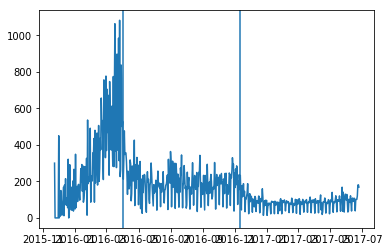

In [18]:
plt.plot(seasonality.norm_volume);
plt.axvline(x='2016-11-10');
plt.axvline(x='2016-04-01');

We see big variability at the beginning of the time series, suggesting a seasonality effect (ups and downs). 
The down picks are due to the sundays.

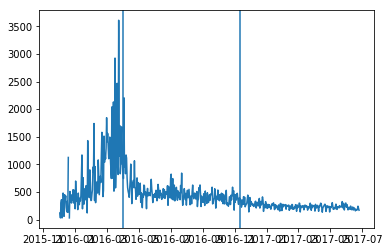

In [19]:
plt.plot(seasonality.norm_volume_open);
plt.axvline(x='2016-11-10');
plt.axvline(x='2016-04-01');

In this plot, we normalized the volume by the shops that sold something, since we don't know if no sell is shop closed or shop not selling.

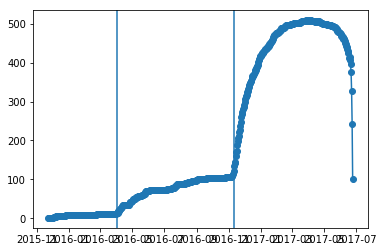

In [20]:
plt.plot(seasonality.n_shops, marker = 'o')
plt.axvline(x='2016-11-10');
plt.axvline(x='2016-04-01');

When we control for the number of shops for each time point, we clearly see that the big variability observed at the beginning is due to few observation available. It seems that more and more information were available along time. It seems that the information about sell started to be increased by the end of 2016 (vertical line on the 10th November 2016). Already at April 2016 we see an increase in the number of shops. The last drop we see at the end of the time series might be due to just lag in receiving information.

Example of the first day: info for only 13 shops.

In [21]:
df_aggregate_per_day_short_with_info_filter[df_aggregate_per_day_short_with_info_filter.date == '2015-12-03']

,store_code,date,volume_day,volume_nan,volume_n,Perc_nan,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
13889,10928,2015-12-03,120.0,14.0,16.0,0.875,2015,12,49,3,3,337,False,False,False,False,False,False,1449100800
19904,11954,2015-12-03,0.0,16.0,16.0,1.000,2015,12,49,3,3,337,False,False,False,False,False,False,1449100800
170826,30478,2015-12-03,0.0,16.0,16.0,1.000,2015,12,49,3,3,337,False,False,False,False,False,False,1449100800


Example of one day at the end of the time series: info for only 484 shops.

In [22]:
df_aggregate_per_day_short_with_info_filter[df_aggregate_per_day_short_with_info_filter.date == '2017-06-09']

,store_code,date,volume_day,volume_nan,volume_n,Perc_nan,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
365,282,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
1189,2286,2017-06-09,1260.0,12.0,20.0,0.60,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
2012,2581,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
2222,2674,2017-06-09,60.0,18.0,20.0,0.90,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
2446,2675,2017-06-09,30.0,19.0,20.0,0.95,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
3222,3933,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
3444,4068,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
3741,4069,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
4250,4565,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400
6676,10055,2017-06-09,0.0,20.0,20.0,1.00,2017,6,23,9,4,160,False,False,False,False,False,False,1496966400


This let me to hypothesis to give a first screening independently of the time series as first pass. We then will integrate the time information.

## Time-independent analysis

We decide at first to use `norm_volume_all_days` as target variable. We remove all the other variables coming from the `sales` dataset.

In [272]:
flds = ['store_code','norm_volume_all_days']
final_y = df_shops_days_filer[flds]

In [273]:
final_no_time = final_y.merge(metadata_no_day, how='left', on='store_code')
# Remove types at beginning, maybe added later in a second step
final_no_time = final_no_time[final_no_time.columns.drop(list(final_no_time.filter(regex='types')))]

def coherce_type(df, reg, typ):
    float_columns = [x for x in df.columns if reg in x]
    for cl in float_columns:
        df[cl] = df[cl].astype(typ)
    return df

## Float columns
final_no_time = coherce_type(final_no_time, '_mean_', 'float64')

## Integer column
final_no_time = coherce_type(final_no_time, '_n', 'int')

In [274]:
complete_null_columns = final_no_time.isnull().all()
col_to_remove = complete_null_columns[complete_null_columns == True]
col_to_remove

movie_rental_mean_rating    True
dtype: bool

We remove the column `movie_rental_mean_rating` due to missing values

In [275]:
final_no_time = final_no_time[final_no_time.columns.drop('movie_rental_mean_rating')]

In [276]:
train, test = train_test_split(final_no_time[final_no_time.columns.drop('store_code')], test_size=0.20)

In [277]:
train.shape[0], test.shape[0]

(383, 96)

Since we are working we a sample size of 383 POSs, we will use CV, instead of split agian the training set between training and validation set.

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call train_cats to convert strings to pandas categories.

In [278]:
train_cats(train)

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [279]:
df, y, nas = proc_df(train, 'norm_volume_all_days')

After splitting training and test sets, we might have columns with complete missing values. We set them to 0.

In [280]:
df.fillna(0, inplace=True)

We try to learn with a Random Forest

In [281]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.8041009964747462